# xarray wrapper - introduction

Start with a very simple example of a dataset that is dependent only on time. Perhaps move onto a more complex example later if needed. 


In [14]:
import pIMOS.xrwrap.SEABIRD_37_39_56 as wrap_sbd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np 

os.path.exists(r'./KISSME samples/SBE39/3724.cnv')

False

# Load a file

Use the wrapper to generate an xarray dataset. Start with a SBE39 T. You can parse a dictionary of attributes to the file on load. 

In [2]:

asc_filename = r'../../pIMOS_samples/KISSME samples/SBE39/3724.asc'
asc_filename = r'../../pIMOS_samples/KISSME samples/SBE39/67761705.asc' 


attributes = {'site': 'fake site',
              'trip_deployed':   'KISSME_deployment',
              'trip_recovered':  'KISSME_recovery',
              'instrument_make': 'seabird',
              'instrument_model': 'SBE39',}

folder, file = os.path.split(asc_filename)
rr = wrap_sbd.SEABIRD_37_39_56(folder, file, model='SBE39', attributes=attributes)


asc file appears to be for an SBE39...
temperature and pressure
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "fake site"
Setting attribute "trip_deployed" to "KISSME_deployment"
Setting attribute "trip_recovered" to "KISSME_recovery"
Setting attribute "instrument_make" to "seabird"
Setting attribute "instrument_model" to "SBE39"


### The underlying xarray dataset
The underlying xarray dataset is accessible by `rr.ds` [ideally would be ._ds to imply limited direct access from outside of the class - ie, provate attribute - but this is not really ready]

In [3]:
rr.ds

<xarray.Dataset>
Dimensions:         (time: 224272)
Coordinates:
  * time            (time) datetime64[ns] 2017-04-01T01:00:00 ... 2017-05-09T...
Data variables:
    Temperature     (time) float64 21.4 21.4 21.4 21.4 ... 12.9 12.9 12.9 12.89
    Pressure        (time) float64 -0.047 -0.047 -0.047 ... 240.2 240.2 240.2
    qc_Temperature  (time) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0
    qc_Pressure     (time) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0

### Data variables and QC variables

Note that there are two qc variables [qc_Temperature and qc_Pressure]. In this simple example it is evident which qc variable corresponds to which data variable, but this will not be the case for more somplex datasets [e.g. ADCP data]. Also it is not strictly necessary that the qc variables begin with 'qc_'. Rather,  qc variables are identifiable by the `is_qc_flag` variable attribute. The associated variables indicated by the `associated_data_variables` variable attribute. 

Similarly, data variables have `qc_variable` attributes. In this simple example, each variable has only one qc flag, but this is not the case for more complicated data sets. 


### Global attributes
Note that the global attributes of the ds object is empty. Attributes are in the ._attrs property of the object. 

In [4]:
rr._attrs

{'title': 'Measured data from a Seabird Data Logger',
 'institution': 'The University of Western Australia',
 'source': 'Seabird Data Logger',
 'project': '',
 'history': '',
 'references': '',
 'comment': '',
 'Conventions': 'CF-1.7',
 'trip_recovered': 'KISSME_recovery',
 'trip_deployed': 'KISSME_deployment',
 'site': 'fake site',
 'instrument_make': 'seabird',
 'instrument_model': 'SBE39',
 'disclaimer': ''}

There are some other defaults in there too. Attributes are exchanged between the wrapper and the dataset on load and export. Hopefully seamlessly. 

Attributes should be updated using the `update_attribute` method

`rr.update_attribute(attribute_name, attribute_value, strict=True)`

In [5]:
rr.update_attribute('site', 'THIS IS NOT A REAL SITE EITHER')
rr._attrs

Setting attribute "site" to "THIS IS NOT A REAL SITE EITHER"


{'title': 'Measured data from a Seabird Data Logger',
 'institution': 'The University of Western Australia',
 'source': 'Seabird Data Logger',
 'project': '',
 'history': '',
 'references': '',
 'comment': '',
 'Conventions': 'CF-1.7',
 'trip_recovered': 'KISSME_recovery',
 'trip_deployed': 'KISSME_deployment',
 'site': 'THIS IS NOT A REAL SITE EITHER',
 'instrument_make': 'seabird',
 'instrument_model': 'SBE39',
 'disclaimer': ''}

### CF Compliance
Where possible I have attempted to make these files QC compliant. Some variables may not be QC compliant however. There are tools for checking and I have coded up many variables and accepted units in the module `zutils.cf_conventions`

In [13]:
from zutils import cf_conventions as zcf
dir(zcf)

zcf.get_canonical_units()

{'signal_intensity_from_multibeam_acoustic_doppler_velocity_sensor_in_sea_water': ['counts',
  'db'],
 'proportion_of_acceptable_signal_returns_from_acoustic_instrument_in_sea_water': ['%',
  'percent'],
 'indicative_error_from_multibeam_acoustic_doppler_velocity_profiler_in_sea_water': ['m/s'],
 'beam_consistency_indicator_from_multibeam_acoustic_doppler_velocity_profiler_in_sea_water': ['%'],
 'acoustic_signal_roundtrip_travel_time_in_sea_water': ['s'],
 'acoustic_surface_track_distance': ['m'],
 'acoustic_bottom_track_distance': ['m'],
 'frequency': ['Hz', 'rad/s'],
 'wave_frequency': ['Hz', 'rad/s'],
 'sea_surface_wave_frequency': ['Hz', 'rad/s'],
 'turbulence_frequency': ['Hz', 'rad/s'],
 'wavenumber': ['cpm', 'rad/m'],
 'wave_wavenumber': ['cpm', 'rad/m'],
 'sea_surface_wave_wavenumber': ['cpm', 'rad/m'],
 'turbulence_wavenumber': ['cpm', 'rad/m'],
 'variance_spectral_density': ['m2 Hz-1'],
 'wave_variance_spectral_density': ['m2 Hz-1'],
 'sea_surface_wave_variance_spectral_densi

I'm hoping others can add to/improve this list over time. Can check the file by running the code `zcf.check_all(rr.ds, '1.7')`, but this will have to wait until after export where the global attributes are actually added to the xarray Dataset.

## Plot some data
No inbuild plotting codes as yet. Access the raw data by `rr.ds['Temperature']` and the QC data by `rr.get_qaqc_var('Temperature')`. The latter returns a copied xarray Data_Array that is not in the actual xarray Dataset. Both datasets are the same as no QC has been applied.

Blanking 0 values.


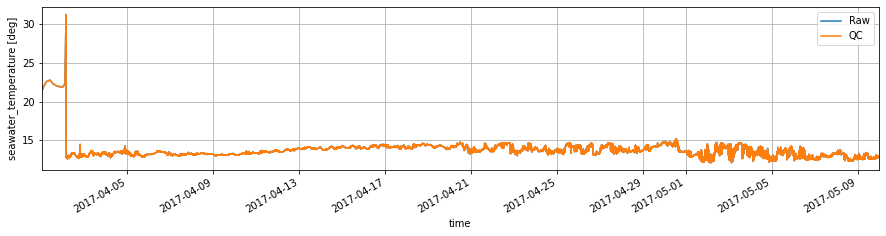

In [7]:
%matplotlib inline

# You can still pull the raw data like this
rr.ds['Temperature'].plot(figsize=(15, 3), label='Raw')
rr.get_qaqc_var('Temperature').plot(label='QC')
plt.grid()
plt.xlim(rr.ds.time[[0, -1]])
plt.legend()
plt.show()


There are some clear out of water effects. Update QC flags using the `update_qc_flag` method:

```rr.update_qc_flag(
    flag_name,
    index_name,
    start,
    end,
    flag_value,
    comment=None,
    verbose=False,
)```

If you wish to update all flags in the file use `'*'` as the flag name. Alternately pass a list of flag names. 

Blanking 6721 values.


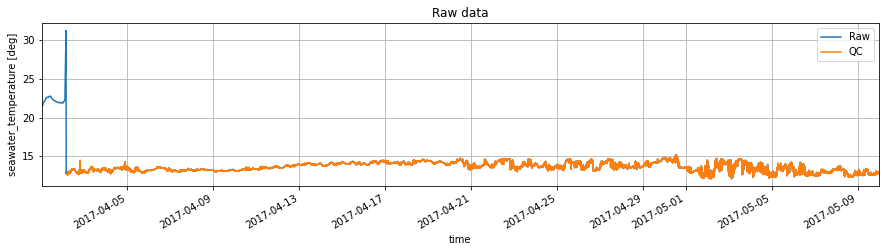

In [8]:
%matplotlib inline

rr.update_qc_flag('*', 
                  'time',
                  np.datetime64(datetime.datetime(2017, 1, 1)),
                  np.datetime64(datetime.datetime(2017, 4, 2, 5)),
                  1,
                  comment='Out of water',
                  )

rr.ds['Temperature'].plot(figsize=(15, 3), label='Raw')
rr.get_qaqc_var('Temperature').plot(label='QC')
plt.grid()
plt.title('Raw data')
plt.xlim(rr.ds.time[[0, -1]])
plt.legend()
plt.show()


In addition to updating the qc flag, the above has updated the `comment` global attribute of the file indicating what QC has been applied, by whom, to what data and why:

In [9]:
rr.ds.qc_Temperature.attrs['comment']

'2021-07-21T22:23:27.291085: [UWA] Flagged 6721 values with code "1" and user comment "Out of water"'

## IMOS QC procedures
We have a bunch of QC procedures coded, many of shich correspond to the [IMOS QC procedures](https://github.com/aodn/imos-toolbox/wiki/QCProcedures). Naturally the next step would be to code all of those procedures in an interface that is as close to IMOS as possible. But I'll confirm with Matt and Nicole first to ensure this is what they actually want done. 

Need to think about a system of QC codes also. Which numbers to actually put into the QC variables.  

### Export
Export using a lite function similar to what would be used to process a whole Field Trip from the pIMOS database.

In [10]:
pIMOS_export_dir = r'../../pIMOS_samples/pIMOS Exports'

os.path.exists(pIMOS_export_dir)
def pIMOS_export(rr, model, serial):
    
    folder = os.path.join(pIMOS_export_dir, model)
    if not os.path.exists(folder):
        os.mkdir(folder)

    print(folder)

    rr.folder = folder
    rr.file_ = serial
    rr.export()
        
pIMOS_export(rr, 'SBE39', 'FAKE')
rr.ds

../../pIMOS_samples/pIMOS Exports\SBE39


<xarray.Dataset>
Dimensions:         (time: 224272)
Coordinates:
  * time            (time) datetime64[ns] 2017-04-01T01:00:00 ... 2017-05-09T...
Data variables:
    Temperature     (time) float64 21.4 21.4 21.4 21.4 ... 12.9 12.9 12.9 12.89
    Pressure        (time) float64 -0.047 -0.047 -0.047 ... 240.2 240.2 240.2
    qc_Temperature  (time) float64 1.0 1.0 1.0 1.0 ... -999.0 -999.0 -999.0
    qc_Pressure     (time) float64 1.0 1.0 1.0 1.0 ... -999.0 -999.0 -999.0
Attributes: (12/14)
    title:             Measured data from a Seabird Data Logger
    institution:       The University of Western Australia
    source:            Seabird Data Logger
    project:           
    history:           
    references:        
    ...                ...
    trip_recovered:    KISSME_recovery
    trip_deployed:     KISSME_deployment
    site:              THIS IS NOT A REAL SITE EITHER
    instrument_make:   seabird
    instrument_model:  SBE39
    disclaimer:

Note now that there are globa attributes in the data set. As such, we can now check CF compliance. 

In [12]:
zcf.check_all(rr.ds, '1.7')

Variable name checks passed
Global attribute checks passed
Variable qc_Temperature is not being checked for CF compliance
Variable qc_Pressure is not being checked for CF compliance
Variable time is not being checked for CF compliance
Variable name checks passed
All checks passed
